In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading dataset

In [2]:
df=pd.read_csv(r"C:\Users\HP\Downloads\titanic_dataset .csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# setting PassengerId as index column
df= pd.read_csv(r"C:\Users\HP\Downloads\titanic_dataset.csv",index_col='PassengerId')

In [5]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Exploratory Data aAnalysis and preprocessing

In [6]:
df.shape

(891, 11)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [8]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [10]:
df['Survived'].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

<Axes: >

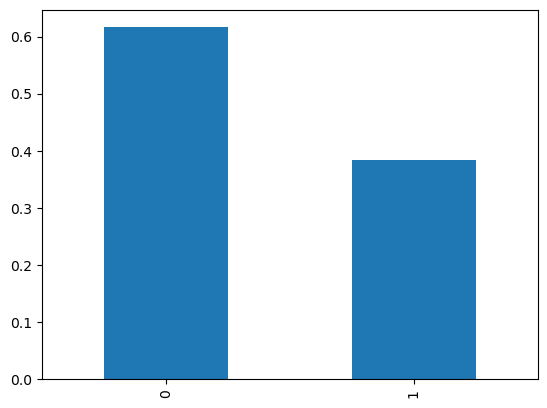

In [11]:
df['Survived'].value_counts(normalize=True).plot.bar()

In [12]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [13]:
df.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [14]:
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

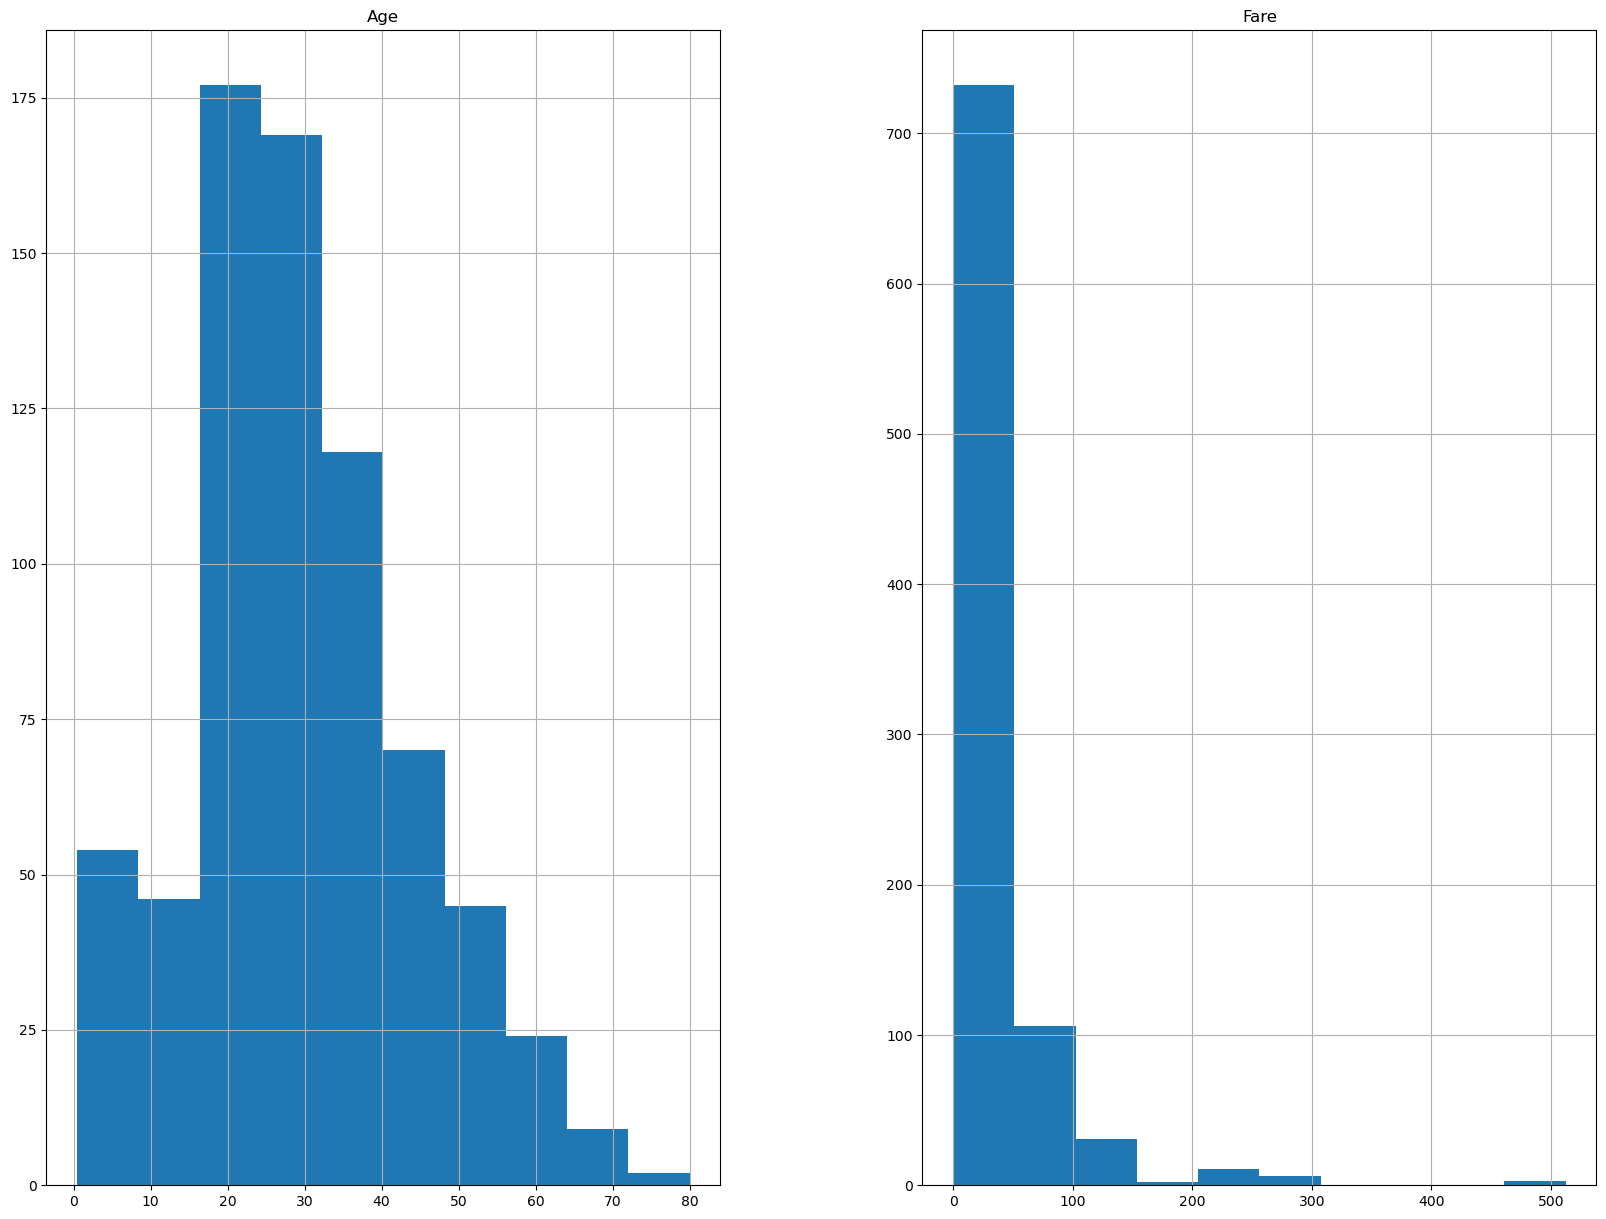

In [15]:
freqgraph = df.select_dtypes(include=['float'])
freqgraph.hist(figsize=(20,15))
plt.show()

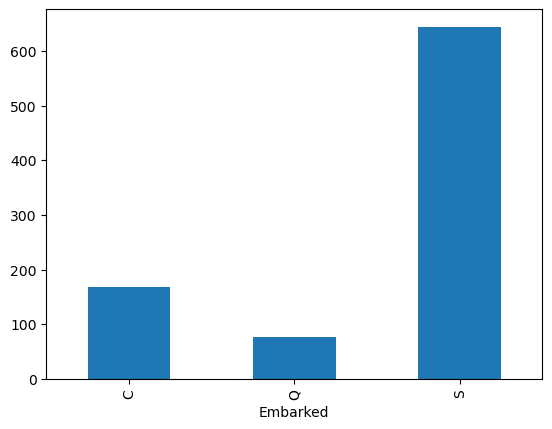

In [16]:
df.groupby('Embarked').size().plot(kind='bar')
plt.show()

In [17]:
num_cols = ['Pclass','Age','SibSp','Parch','Fare']

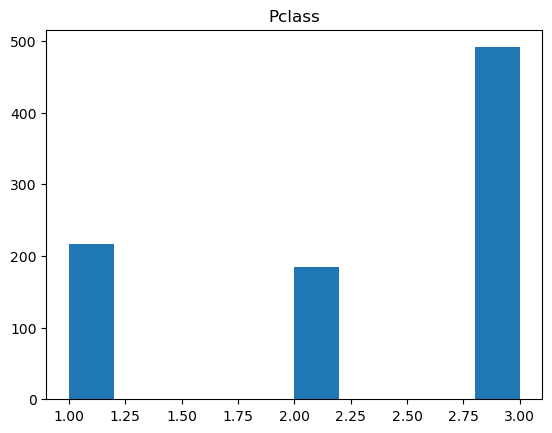

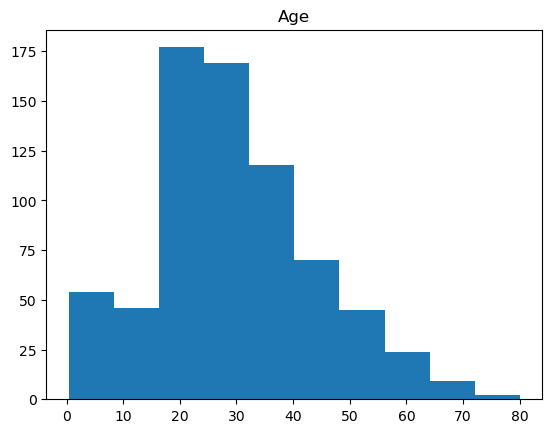

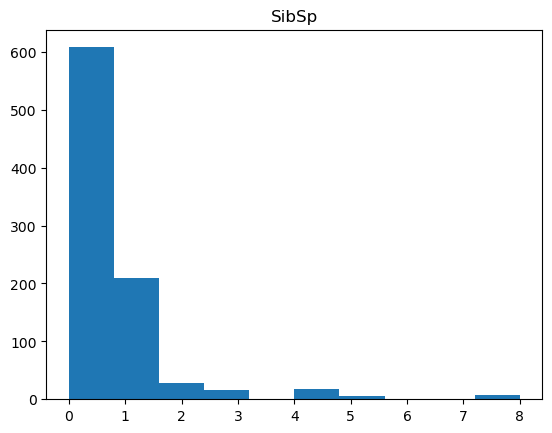

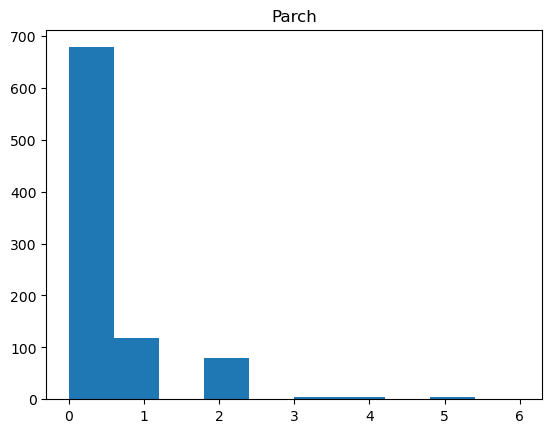

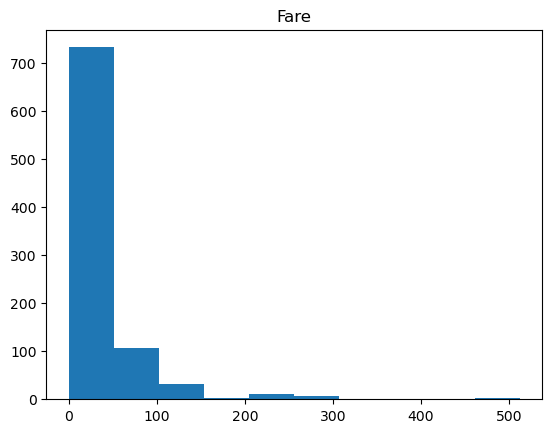

In [18]:
for i in num_cols:
    plt.hist(df[i])
    plt.title(i)
    plt.show()

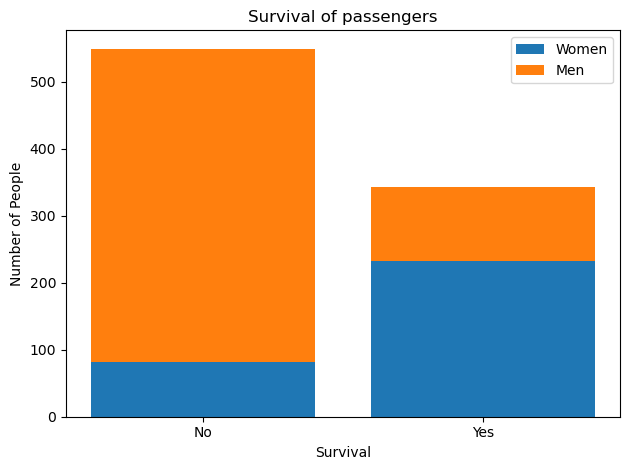

In [19]:
index = df['Survived'].unique() # get the number of bars
grouped_data = df.groupby(['Survived', 'Sex']) 
temp = grouped_data.size().unstack() 
women_stats = (temp.iat[0,0], temp.iat[1,0])
men_stats = (temp.iat[0,1], temp.iat[1,1])
p1 = plt.bar(index, women_stats)
p2 = plt.bar(index, men_stats, bottom=women_stats)
plt.xticks(index, ('No', 'Yes'))
plt.ylabel('Number of People')
plt.xlabel('Survival')
plt.title('Survival of passengers')
plt.legend((p1[0], p2[0]), ('Women', 'Men'))
plt.tight_layout()

<Axes: xlabel='Sex'>

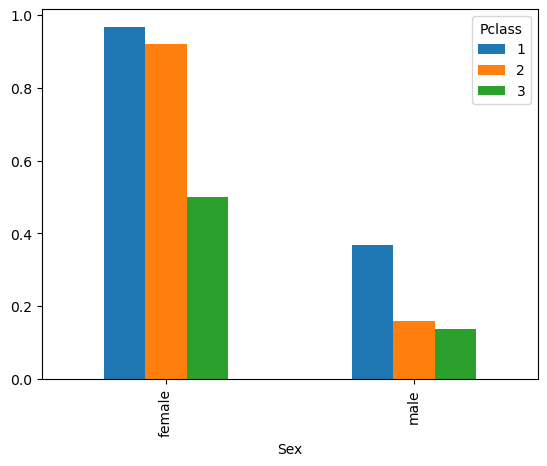

In [20]:
df.pivot_table('Survived',index='Sex',columns='Pclass').plot(kind='bar')

<Axes: xlabel='Sex,Age'>

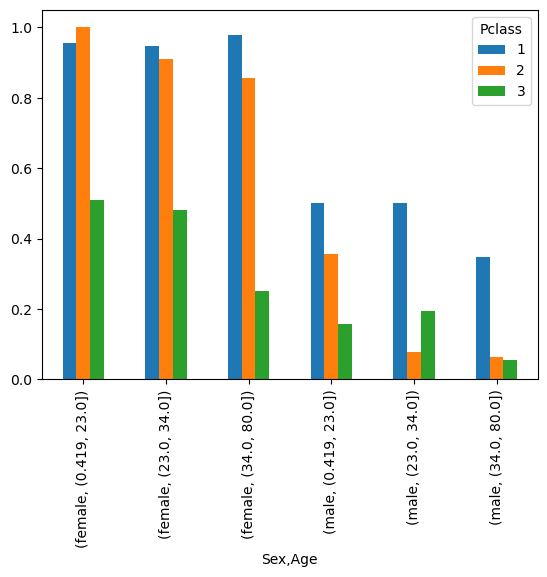

In [21]:
age_intervals = pd.qcut(df['Age'], 3)
df.pivot_table('Survived', ['Sex', age_intervals], 'Pclass').plot(kind='bar')

C:\Users\HP\AppData\Local\Temp\ipykernel_27920\1299140052.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),linewidths = .5, annot = True, cmap = 'YlGnBu', square = True)


<Axes: >

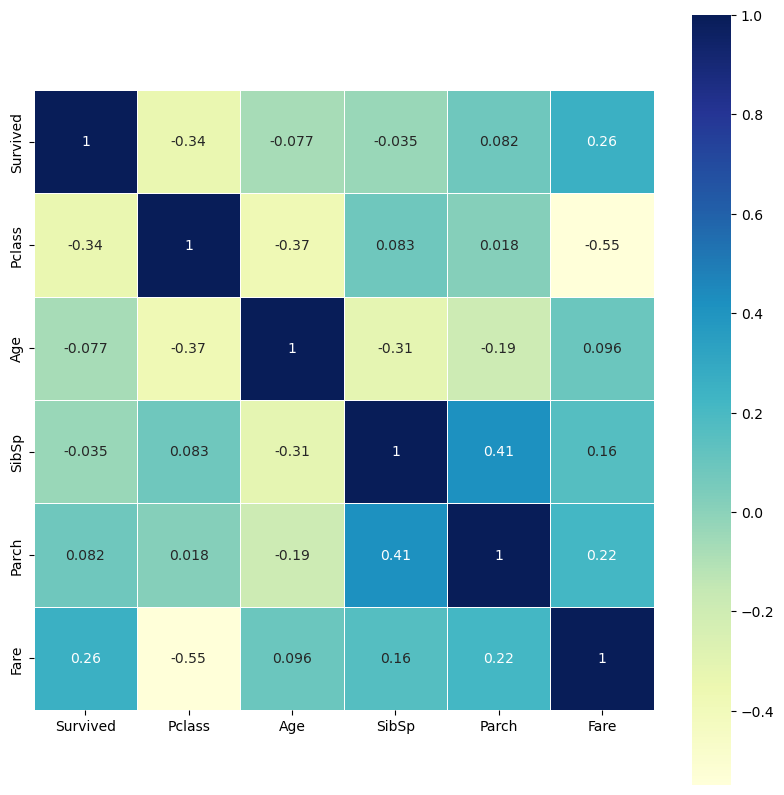

In [22]:
f, ax = plt.subplots(figsize = [10,10])
sns.heatmap(df.corr(),linewidths = .5, annot = True, cmap = 'YlGnBu', square = True)

In [23]:
# missing value imputation with median for numerical column and mode for categorical
df['Age'].fillna(df['Age'].median(),inplace=True)
df['Cabin'].fillna(df['Cabin'].mode()[0], inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [24]:
df.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

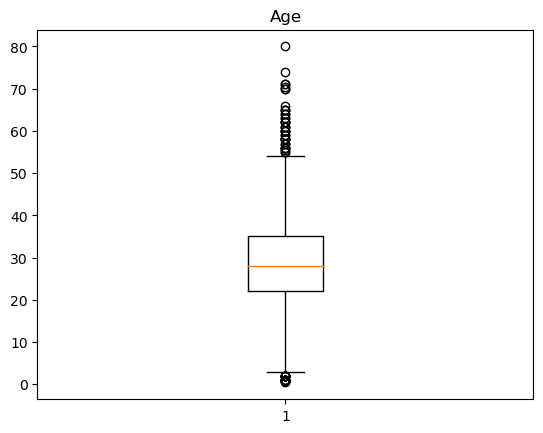

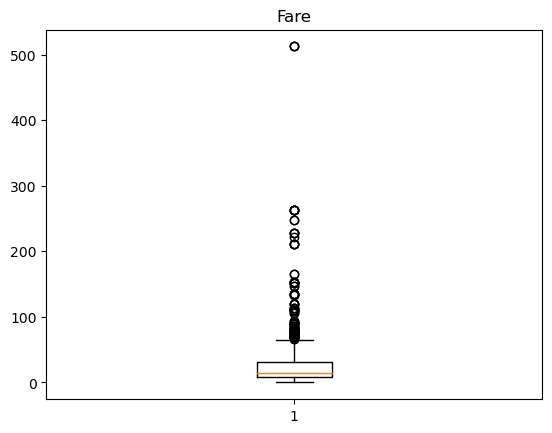

In [25]:
# To find the outliers,
num_features = ["Age", "Fare"]
for i in num_features:
    plt.figure()
    plt.boxplot(df[i])
    plt.title(i)

In [26]:
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
low_lim = Q1 -(1.5*IQR)
up_lim = Q3 +(1.5*IQR)
df['Age']=np.where(df['Age']>up_lim,up_lim,np.where(df['Age']<low_lim,low_lim,df['Age']))

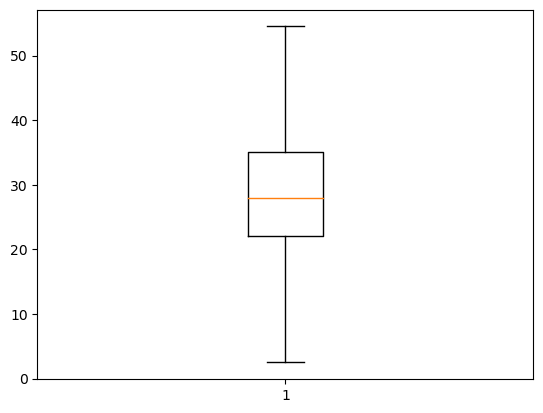

In [27]:
plt.boxplot(df['Age'])
plt.show()

In [28]:
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
low_lim = Q1 -(1.5*IQR)
up_lim = Q3 +(1.5*IQR)
df['Fare']=np.where(df['Fare']>up_lim,up_lim,np.where(df['Fare']<low_lim,low_lim,df['Fare']))

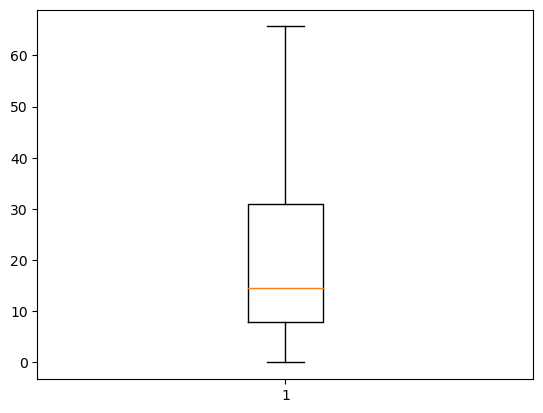

In [29]:
plt.boxplot(df['Fare'])
plt.show()

In [30]:
# standardize the numerical features Age and Fare
from sklearn.preprocessing import StandardScaler

In [31]:
numericals_list = ['Age','Fare']
for column in numericals_list:
    sc = StandardScaler(with_mean=True, with_std=True)
#    print(training_set[column].size)
#    print(test_set[column].size)
    sc.fit(df[column].values.reshape(-1,1))
    df[column] = sc.transform(df[column].values.reshape(-1,1))

In [32]:
# encode categorical classes with sklearn's LabelEncoder
from sklearn.preprocessing import LabelEncoder

In [33]:
categorical_classes_list = ['Sex','Embarked']
encoding_list = []
for column in categorical_classes_list:
    le = LabelEncoder()
    le.fit(df[column])
    encoding_list.append(df[column].unique())
    encoding_list.append(list(le.transform(df[column].unique())))
    df[column] = le.transform(df[column])

In [34]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [35]:
# splitting dataset into features and target
x = df.drop(['Survived','Name','Ticket',
       'Fare', 'Cabin', 'Embarked' ], axis=1)
y = df["Survived"] #target

In [36]:
# train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

# kNN model

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [51]:
k_range = range(1,26)
scores= []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    y_pred_knn = knn.predict(x_test)
    scores.append(metrics.accuracy_score(y_test,y_pred_knn))  
print(scores)

[0.7988826815642458, 0.8156424581005587, 0.8324022346368715, 0.8100558659217877, 0.7932960893854749, 0.8156424581005587, 0.8044692737430168, 0.8044692737430168, 0.8044692737430168, 0.8044692737430168, 0.8044692737430168, 0.7988826815642458, 0.8212290502793296, 0.8100558659217877, 0.8100558659217877, 0.7988826815642458, 0.7988826815642458, 0.7988826815642458, 0.7932960893854749, 0.7821229050279329, 0.7821229050279329, 0.776536312849162, 0.7932960893854749, 0.8100558659217877, 0.7932960893854749]


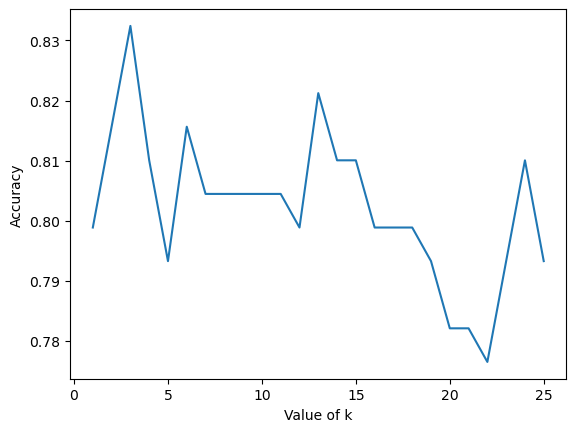

In [52]:
plt.plot(k_range, scores)
plt.xlabel('Value of k')
plt.ylabel('Accuracy')
plt.show()

In [53]:
# k=3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
y_pred_knn = knn.predict(x_test)
print(metrics.accuracy_score(y_test,y_pred_knn))

0.8324022346368715


### K-fold cross validation

In [54]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold_validator = KFold(10)

In [57]:
knn_kcv_result = cross_val_score(knn,x,y, cv=kfold_validator)
np.mean(knn_kcv_result)

0.8014606741573035

### Stratified k-fold cross validation

In [58]:
from sklearn.model_selection import StratifiedKFold
skfold_validator = StratifiedKFold(n_splits=10)
skcv_result = cross_val_score(knn,x,y,cv=skfold_validator)
np.mean(skcv_result)

0.811498127340824

# SVM model

In [46]:
# building svm model
from sklearn.svm import SVC
svm = SVC()
from sklearn.metrics import accuracy_score

In [65]:
# predicting using svm
svm = SVC(kernel='linear')
svm.fit(x_train,y_train)
y_pred_svm = svm.predict(x_test)
print('Accuracy is:',accuracy_score(y_test,y_pred_svm))

Accuracy is: 0.7821229050279329


### k-fold cross validation

In [62]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold_validator = KFold(10)

svm_kcv_result = cross_val_score(svm,x,y, cv=kfold_validator)
np.mean(svm_kcv_result)

0.786729088639201

### stratified k-fold cross validation

In [64]:
skfold_validator = StratifiedKFold(n_splits=10)
svm_skcv_result2 = cross_val_score(svm,x,y,cv=skfold_validator)
np.mean(svm_skcv_result2)

0.786729088639201